<a href="https://colab.research.google.com/github/AhHosny/CIT690E-DL-Course/blob/master/LAB%233/04_Adadelta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adadelta Optimizer
Adadelta is an extension of the Adagrad optimizer which adapts learning rate based on a moving window of gradient updates instead of accumulating all previous gradients.

### Syntax

The following shows the syntax of the Adadelta optimizer in PyTorch.

```python
torch.optim.Adadelta(params, lr=1.0, rho=0.9, eps=1e-06, weight_decay=0)
```

### Parameters

* <b>params</b> (Union[Iterable[Tensor], Iterable[Dict[str, Any]]]) – These are the iterable parameters that help in optimization
* <b>lr</b> (float) – Learning rate helping optimization (default: 1e-3)
* <b>betas</b> (Tuple[float, float]) – This parameter is used for calculating and running the averages for gradient (default: (0.9, 0.999))
* <b>beta3</b> (float) – Smoothing coefficient (default: 0.9999)
* <b>eps</b> (float) – For improving the numerical stability (default: 1e-8)
* <b>weight_decay</b> (float) – For adding the weight decay (L2 penalty) (default: 0)

# 2-D Function Optimization

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
from IPython.display import HTML

# Optimization of function 
$ f(x) = x^{2} $

In [ ]:
def func2d(x):
    return x**2

In [ ]:
xmin,xmax,xstep = -10.5,10.5,0.2
x_points = np.arange(xmin,xmax,xstep)
f_x_2d = []
for i in range(0,len(x_points)):
    f_x_2d.append(func2d(x_points[i]))

# Pick a starting Point & Define minima of the function

In [ ]:
#x0 = random.randint(int(xmin),int(xmax))
x0 = -8
minima_x = 0
print('X0 : %d'%(x0))
print('Minima : %.2f'%(func2d(minima_x)))

X0 : -8
Minima : 0.00


# Plot Function Surface

Text(0, 0.5, 'F(x)')

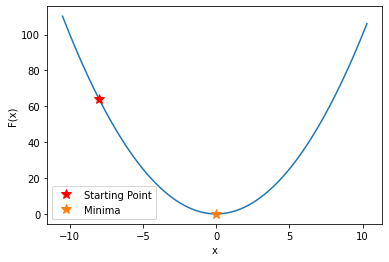

In [ ]:
plt.plot(x_points,f_x_2d)
plt.xlabel('x')
plt.plot(x0,func2d(x0),'r*',markersize=10,label='Starting Point')
plt.plot(minima_x,func2d(minima_x),'*',markersize=10,label='Minima')
plt.legend()
plt.ylabel('F(x)')

# Build Computation Graph for Automatic Differentiation using PyTorch

In [ ]:
import torch
from IPython import display
import time

epochs = 200
learning_rate = 1.0
path_x, path_fx, vel_track = [], [], []
gamma = 0.9

# make sure you set initial point correctly
x = torch.tensor(x0,dtype=torch.float32,requires_grad=True)
optimizer = torch.optim.Adadelta([x],lr=learning_rate,rho=gamma)

for epoch in range(0,epochs):
    
    with torch.no_grad():
        x_numpy = x.detach().numpy()
        path_x.append(np.copy(x_numpy))
        path_fx.append(func2d(np.copy(x_numpy)))
    
    
    # loss
    loss = (x)**2

    # calculate gradients
    loss.backward()
    
    optimizer.step()
    
    x.grad.data.zero_()

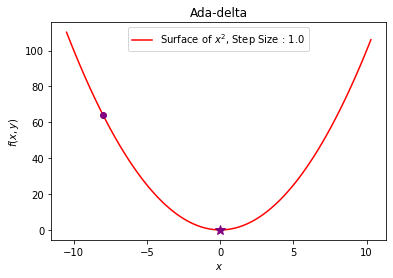

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def animate(i):
    ax.clear()
    ax.plot(x_points,f_x_2d,label='Surface of $x^{2}$, Step Size : '+(str(learning_rate)),color='red')
    ax.plot(minima_x,func2d(minima_x),'*',markersize=10,color='purple', zorder=9)
    ax.plot(path_x[0:i],path_fx[0:i],color='black',linewidth=4, zorder=10)
    ax.plot(path_x[i],path_fx[i],'o',color='purple', zorder=10)
    ax.legend()
    ax.set_xlabel('$x$')
    ax.set_ylabel('$f(x,y)$')
    ax.set_title('Ada-delta')

ani = animation.FuncAnimation(fig,animate,frames=len(path_x),interval=60,repeat=False)

In [ ]:
HTML(ani.to_html5_video())

In [ ]:
ani.save('convex_adadelta.gif',writer='pillow')

# Optimization of function
$ f(x) = log( 1 + |x| ) ^ {2 + sin(x)} $

In [ ]:
def func2d(x):
    return math.log(1 + math.fabs(x)**(2+math.sin(x)))

In [ ]:
xmin,xmax,xstep = -10.5,10.5,0.2
x_points = np.arange(xmin,xmax,xstep)
f_x_2d = []
for i in range(0,len(x_points)):
    f_x_2d.append(func2d(x_points[i]))

# Pick a starting Point & Define minima of the function

In [ ]:
x0 = random.randint(int(xmin),int(xmax))
x0 = 7
minima_x = 0
print('X0 : %d'%(x0))
print('Minima : %.2f'%(func2d(minima_x)))

X0 : 7
Minima : 0.00


# Ploting surface of the function

Text(0, 0.5, 'F(x)')

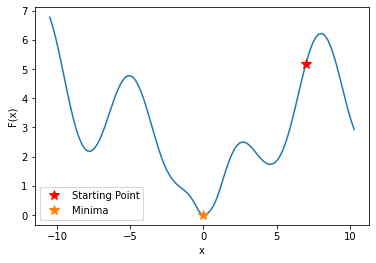

In [ ]:
plt.plot(x_points,f_x_2d)
plt.xlabel('x')
plt.plot(x0,func2d(x0),'r*',markersize=10,label='Starting Point')
plt.plot(minima_x,func2d(minima_x),'*',markersize=10,label='Minima')
plt.legend()
plt.ylabel('F(x)')

In [ ]:
import torch
from IPython import display
import time

epochs = 300
learning_rate = 1.00
path_x, path_fx, vel_track = [], [], []
gamma = 0.9

# make sure you set initial point correctly
x = torch.tensor(x0,dtype=torch.float32,requires_grad=True)
optimizer = torch.optim.Adadelta([x],lr=learning_rate,rho=gamma)
for epoch in range(0,epochs):
    
    with torch.no_grad():
        x_numpy = x.detach().numpy()
        path_x.append(np.copy(x_numpy))
        path_fx.append(func2d(np.copy(x_numpy)))
        
    # loss
    loss = torch.log(1 + (torch.abs(x)**(2 + torch.sin(x))))
    
    # calculate gradients
    loss.backward()
    
    # Update params
    optimizer.step()
    
    # make gradients zeros
    x.grad.data.zero_()

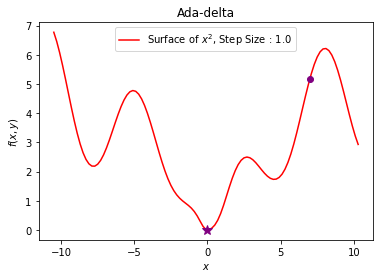

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def animate(i):
    ax.clear()
    ax.plot(x_points,f_x_2d,label='Surface of $x^{2}$, Step Size : '+(str(learning_rate)),color='red')
    ax.plot(minima_x,func2d(minima_x),'r*',markersize=10,color='purple')
    ax.plot(path_x[0:i],path_fx[0:i],color='black',linewidth=4)
    ax.plot(path_x[i],path_fx[i],'o',color='purple')
    ax.legend()
    ax.set_xlabel('$x$')
    ax.set_ylabel('$f(x,y)$')
    ax.set_title('Ada-delta')

ani = animation.FuncAnimation(fig,animate,frames=len(path_x),interval=60,repeat=False)

In [ ]:
HTML(ani.to_html5_video())

In [ ]:
ani.save('non_convex_adadelta.gif',writer='pillow')

# 3D function optimization
$ f(x) = x^2 + y^2 $

In [ ]:
f  = lambda x, y: (x**2) - (y**2)

In [ ]:
xmin,xmax,xstep = -4.5,4.5,0.2
ymin,ymax,ystep = -4.5,4.5,0.2

In [ ]:
x,y = np.meshgrid(np.arange(xmin,xmax,xstep),np.arange(ymin,ymax,ystep))
z = f(x,y)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Pick a starting Point & Define minima of the function

In [ ]:
x0 = -3
y0 = -0.1
print('X0 : %.2f, Y0 : %.2f '%(x0,y0))

X0 : -3.00, Y0 : -0.10 


# Plot function surface

Text(0.5, 0, '$f(x,y)$')

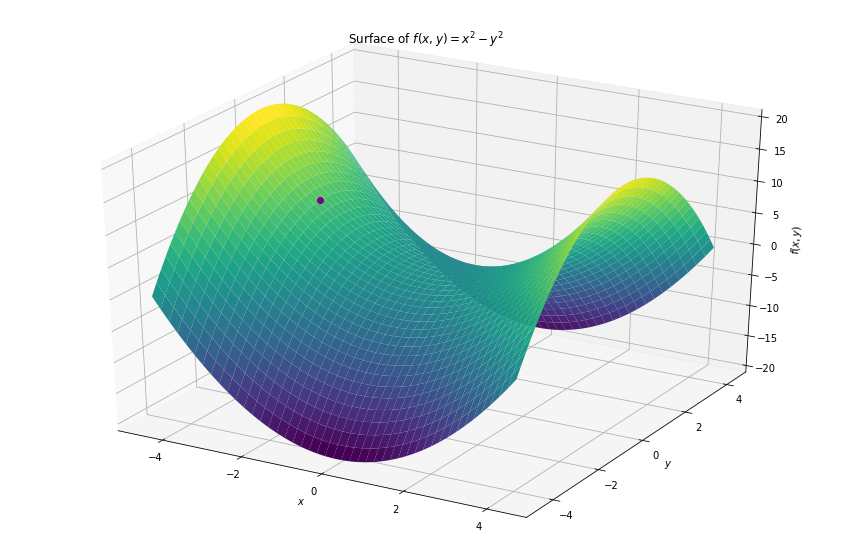

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.plot_surface(x,y,z,cmap='viridis')
ax.plot([x0],[y0],[f(x0,y0)],'o', color='purple', zorder=10)
ax.set_title('Surface of $f(x,y) = x^{2} - y^{2}$')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x,y)$')

In [ ]:
import torch
from IPython import display
import time

epochs = 150
learning_rate = 1.0

path_x, path_y, path_fxy = [], [], []
gamma = 0.9

# make sure you set initial point correctly
x_torch = torch.tensor(x0,dtype=torch.float32,requires_grad=True)
y_torch = torch.tensor(y0,dtype=torch.float32,requires_grad=True)

optimizer = torch.optim.Adadelta([x_torch,y_torch],lr=learning_rate,rho=gamma)

for epoch in range(0,epochs):
    
    with torch.no_grad():
        x_numpy = x_torch.detach().numpy()
        y_numpy = y_torch.detach().numpy()
        
        path_x.append(np.copy(x_numpy))
        path_y.append(np.copy(y_numpy))
        path_fxy.append(np.copy(f(x_numpy,y_numpy)))
    
    # objective function
    loss = (x_torch**2) - (y_torch**2)
    
    # backward
    loss.backward()
    
    # Update params
    optimizer.step()
    
    # make gradients zero
    x_torch.grad.data.zero_()
    y_torch.grad.data.zero_()

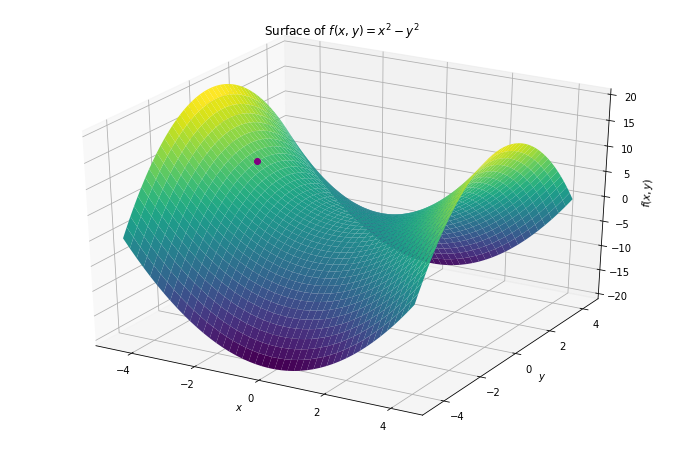

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
ax.set_title('Ada-delta')
def animate(i):
    
    ax.clear()
    ax.plot_surface(x,y,z,cmap='viridis')
    ax.plot([x0],[y0],[f(x0,y0)],'o', color='purple', zorder=10)
    ax.plot(path_x[0:i],path_y[0:i],path_fxy[0:i],linewidth=2,color='black', zorder=10)
    ax.set_title('Surface of $f(x,y) = x^{2} - y^{2}$')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$f(x,y)$')
    ax.set_label('Ada-delta')

ani = animation.FuncAnimation(fig,animate,frames=len(path_x),interval=60,repeat=True)

In [ ]:
HTML(ani.to_html5_video())

In [ ]:
ani.save('3d_surface_adadelta.gif',writer='pillow')

# End!